In [1]:
import os
import torch

def ESM2_encoding(folder_path):
    """
    Parameters:
    - folder_path: Path to the folder containing ESM2 encoded .pt files
    
    Returns:
    - protein_dict: A dictionary where keys are protein names and values are their encodings
    - num_proteins: The number of proteins
    """
    protein_dict = {}
    for file_name in sorted(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file_name)
        if file_name.endswith(".pt"):
            tensor = torch.load(file_path)['mean_representations'][33].tolist()  
            protein_key = os.path.splitext(file_name)[0]
            protein_dict[protein_key] = tensor

    num_proteins = len(protein_dict)
    print("Number of proteins:", num_proteins)
    return protein_dict, num_proteins

protein_dict, _ = ESM2_encoding("/mnt/disk1/guoxiaokun/isoform/RF/ESM2_1280")


Number of proteins: 45768


In [ ]:
import os
import numpy as np

def ProtT5_encoding(folder_path):
    """
    Encodes protein sequences using ProtT5 embeddings by averaging the tensor values 
    and converting them into a flattened list.

    Args:
        folder_path: Path to the folder containing ProtT5-encoded .npy files.

    Returns:
        dict: A dictionary where keys are protein names and values are the corresponding 
              flattened embedding tensors.
    """
    prott5_dict = {}

    for file_name in sorted(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file_name)
        if file_name.endswith(".npy"):
            tensor = np.mean(np.load(file_path), axis=0).reshape(1, -1).flatten().tolist()
            protein_key = os.path.splitext(file_name)[0]
            prott5_dict[protein_key] = tensor

    return prott5_dict

folder_path = "/mnt/disk1/guoxiaokun/isoform/Prott5/encode"
prott5_dict = ProtT5_encoding(folder_path)

In [15]:
import pandas as pd
import numpy as np
data = pd.read_csv('/mnt/disk1/guoxiaokun/isoform/PeSTO/PeSTo-main/RF/geometirc.sencond.simple.feature.txt', sep='\t', header=None)

data = data.iloc[:, 0]
ran_data = pd.DataFrame(np.random.randn(756, 10))
data = combined = pd.concat([data, ran_data], axis=1)
n = data.shape[1]
data.columns = list(range(n))

protein_dict_geo = {}
for i, row in data.iterrows():
    key = row[0]
    values = row[1:].tolist()
    protein_dict_geo[key] = values

In [4]:
##CT编码
import pandas as pd
import itertools
def CT(list_sequence):
    t1 = ['1', '2', '3', '4', '5', '6', '7']
    t2 = ['1', '2', '3', '4', '5', '6', '7']
    t3 = ['1', '2', '3', '4', '5', '6', '7']
    c = list(itertools.product(t1, t2, t3))
    v343 = []
    for i in c:
        str = ''.join(i)
        v343.append(str)
    l15 = []
    look = 0
    
    for sequence in list_sequence:
        sequence = sequence.replace('A', '1')
        sequence = sequence.replace('G', '1')
        sequence = sequence.replace('V', '1')
        sequence = sequence.replace('C', '2')
        sequence = sequence.replace('D', '3')
        sequence = sequence.replace('E', '3')
        sequence = sequence.replace('F', '4')
        sequence = sequence.replace('I', '4')
        sequence = sequence.replace('L', '4')
        sequence = sequence.replace('P', '4')
        sequence = sequence.replace('H', '5')
        sequence = sequence.replace('N', '5')
        sequence = sequence.replace('Q', '5')
        sequence = sequence.replace('W', '5')
        sequence = sequence.replace('K', '6')
        sequence = sequence.replace('R', '6')
        sequence = sequence.replace('M', '7')
        sequence = sequence.replace('S', '7')
        sequence = sequence.replace('T', '7')
        sequence = sequence.replace('Y', '7')
        v = []
        m = 0
        while m < len(sequence) - 2:  # 连续取三个氨基酸
            t = sequence[m:m + 3]
            v.append(t)
            m = m + 1
        num = []
        for i in v343:
            n = v.count(i)
            l = len(sequence)
            l = l - 2
            t = n / l
            t = ('%.4f' % t)
            t = float(t)
            num.append(t)
        l15.append(num)
        look += 1
    return l15

file_path = "/mnt/disk1/guoxiaokun/isoform/RF/data/isoform.tr.all.fa.csv"
data = pd.read_csv(file_path, sep='\t')
seq_list = b_list = data['seq'].tolist()
CT_list = CT(seq_list)
CT_df = pd.DataFrame(CT_list)
CT_dict={}
for i in range(795):
    CT_dict[data.iloc[:,0][i]] = CT_list[i]

In [34]:
#DPC编码
def DPC(list_sequence):
    t1 = ['A','G','V','C','D','E','F','I','L','P','H','N','Q','W','K','R','M','S','T','Y']
    t2 = ['A','G','V','C','D','E','F','I','L','P','H','N','Q','W','K','R','M','S','T','Y']
    c = list(itertools.product(t1, t2))
    v400 = [] 
    for i in c:
        str = ''.join(i)
        v400.append(str)
    look = 0
    l15 = [] 
    for sequence in list_sequence:
        v = []
        m = 0
        while m < len(sequence) - 1:  
            t = sequence[m:m + 2]
            v.append(t) 
            m = m + 1
        num = [] 
        for i in v400:
            n = v.count(i)
            l = len(sequence)
            l = l - 1
            t = n / l
            t = ('%.4f' % t)
            t = float(t)
            num.append(t)
        l15.append(num)
        look += 1
    return l15

file_path = "/mnt/disk1/guoxiaokun/isoform/RF/data/isoform.tr.all.fa.csv"
data = pd.read_csv(file_path, sep='\t')
seq_list = b_list = data['seq'].tolist()
DPC_list = DPC(seq_list)
DPC_df = pd.DataFrame(DPC_list)
DPC_dict={}
for i in range(795):
    DPC_dict[data.iloc[:,0][i]] = DPC_list[i]

In [ ]:
# AC编码
H1 = [0.62,0.29,-0.9,-0.74,1.19,0.48,-0.4,1.38,-1.5,1.06,0.64,-0.78,0.12,-0.85,-2.53,-0.18,-0.05,1.08,0.81,0.26]
H2 = [-0.5,-1,3,3,-2.5,0,-0.5,-1.8,3,-1.8,-1.3,2,0,0.2,3,0.3,-0.4,-1.5,-3.4,-2.3]
V = [27.5,44.6,40,62,115.5,0,79,93.5,100,93.5,94.1,58.7,41.9,80.7,105,29.3,51.3,71.5,145.5,117.3]
P1 = [8.1,5.5,13,12.3,5.2,9,10.4,5.2,11.3,4.9,5.7,11.6,8,10.5,10.5,9.2,8.6,5.9,5.4,6.2]
P2 = [0.046,0.128,0.105,0.151,0.29,0,0.23,0.186,0.219,0.186,0.221,0.134,0.131,0.18,0.291,0.062,0.108,0.14,0.409,0.298]
SASA = [1.181,1.461,1.587,1.862,2.228,0.881,2.025,1.81,2.258,1.931,2.034,1.655,1.468,1.932,2.56,1.298,1.525,1.645,2.663,2.368]
NCI = [0.007187,-0.03661,-0.02382,0.006802,0.037552,0.179052,-0.01069,0.021631,0.017708,0.051672,0.002683,0.005392,0.239531,0.049211,0.043587,0.004627,0.003352,0.057004,0.037977,0.023599]
dic1 = {"H1":H1,"H2":H2,"V":V,"P1":P1,"P2":P2,"SASA":SASA,"NCI":NCI} 
from pandas import DataFrame
data1 = DataFrame(dic1) 
data1.rename({0:'A',1:'C',2:'D',3:'E',4:'F',5:'G',6:'H',7:'I',8:'K',9:'L',
              10:'M',11:'N',12:'P',13:'Q',14:'R',15:'S',16:'T',17:'V',18:'W',19:'Y'},inplace=True) 
from numpy import * 
m1 = mean(H1)
m2 = mean(H2)
m3 = mean(V)
m4 = mean(P1)
m5 = mean(P2)
m6 = mean(SASA)
m7 = mean(NCI)
mean = [m1,m2,m3,m4,m5,m6,m7] 
import numpy as np 
sd1 = np.std(H1,ddof=1)
sd2 = np.std(H2,ddof=1)
sd3 = np.std(V,ddof=1)
sd4 = np.std(P1,ddof=1)
sd5 = np.std(P2,ddof=1)
sd6 = np.std(SASA,ddof=1)
sd7 = np.std(NCI,ddof=1)
sd = [sd1,sd2,sd3,sd4,sd5,sd6,sd7] 
data1.loc['mean']=mean 
data1.loc['sd']=sd
all_aa = []
for indexs in data1.index[:20]: 
    t = data1.loc[indexs].values[0:]
    index = 0
    aa = []
    for i in t: 
        p = (i-mean[index])/sd[index] 
        index += 1
        aa.append(p)
    all_aa.append(aa)
dic2 = {"A":all_aa[0],"C":all_aa[1],"D":all_aa[2],"E":all_aa[3],"F":all_aa[4],
        "G":all_aa[5],"H":all_aa[6],"I":all_aa[7],"K":all_aa[8],"L":all_aa[9],
        "M":all_aa[10],"N":all_aa[11],"P":all_aa[12],"Q":all_aa[13],"R":all_aa[14],
        "S":all_aa[15],"T":all_aa[16],"V":all_aa[17],"W":all_aa[18],"Y":all_aa[19]}
def AC(list_sequence):
    look = 0
    l15 = [] 
    for sequence in list_sequence:
        L = len(sequence)
        AC = []
        for lag in range(1,30): 
            for j in range(0,7): 
                value1 = [] 
                for num in range(0,len(sequence)):
                    aacid = sequence[num] 
                    phpro = dic2[aacid] 
                    vector = phpro[j]
                    value1.append(vector)
                R_k_j = sum(value1)
                value2 = []
                for num in range(0, (len(sequence)-lag-1)):
                    aacid1 = sequence[num]  
                    phpro1 = dic2[aacid1] 
                    R_i_j = phpro1[j] 
                    vector1 = R_i_j - ((1/L)*R_k_j)
                    aacid2 = sequence[(num+lag)]  
                    phpro2 = dic2[aacid2]  
                    R_i_lag_j = phpro2[j]
                    vector2 = R_i_lag_j - ((1/L)*R_k_j)
                    vector3 = vector1*vector2
                    value2.append(vector3)
                v1 = sum(value2)
                print(f"len_seq:{len(sequence)},lag:{lag}")
                ac = (1/(len(sequence)-lag))*v1
                AC.append(ac)
        l15.append(AC)
        look += 1
    return l15

file_path = "/mnt/disk1/guoxiaokun/isoform/RF/data/isoform.tr.all.fa.csv"
data = pd.read_csv(file_path, sep='\t')
seq_list = b_list = data['seq'].tolist()
print(seq_list)
AC_list = AC(seq_list)
AC_df = pd.DataFrame(AC_list)
AC_dict={}
for i in range(795):
    AC_dict[data.iloc[:,0][i]] = AC_list[i]

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

protein_seq = 'ACDEFGHIKLMNPQRSTVWY'
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(list(protein_seq))
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

# 显示结果
print('原始序列：', protein_seq)
print('One-hot编码：\n', onehot_encoded.shape)


In [3]:
import pandas as pd

def process_data(train_file, test_file, protein_dict, encode="RF.ESM2"):
    """
    Process training and testing data, generating a vector file that contains Protein1, Protein2, and their labels.
    
    Parameters:
        train_file (str): Path to the training data file.
        test_file (str): Path to the testing data file.
        protein_dict (dict): Dictionary containing protein names and their corresponding vectors.
        encode (str): Encoding format and prefix for the output file name. Default is "filter.ESM2".
    
    Returns:
        df_protein (DataFrame): Processed training DataFrame.
        test_df_protein (DataFrame): Processed testing DataFrame.
        merge_protein_dict (dict): Merged dictionary of protein vectors.
    """

    # Read the training and testing files
    df = pd.read_csv(train_file, sep='\t', header=None, names=["Protein1", "Protein2", "Label"])
    test_df = pd.read_csv(test_file, sep='\t', header=None, names=["Protein1", "Protein2", "Label"])
    
    protein_data = []
    merge_protein_dict = {}

    # Process training data
    for index, row in df.iterrows():
        protein1 = row["Protein1"]
        protein2 = row["Protein2"]
        label = row["Label"]

        if protein1 in protein_dict and protein2 in protein_dict:
            list1 = protein_dict[protein1]
            list2 = protein_dict[protein2]
            merge_protein_dict[protein1] = list1
            merge_protein_dict[protein2] = list2
            protein_data.append((float(label), list1, list2))

    df_protein = pd.DataFrame(protein_data, columns=["Label", "Protein1", "Protein2"])
    df_protein = pd.concat([df_protein["Label"],
                            df_protein["Protein1"].apply(pd.Series),
                            df_protein["Protein2"].apply(pd.Series)], axis=1)
    df_protein.to_csv(f"{encode}.train.csv", index=False, header=False)

    # Process testing data
    protein_data = []
    for index, row in test_df.iterrows():
        protein1 = row["Protein1"]
        protein2 = row["Protein2"]
        label = row["Label"]

        if protein1 in protein_dict and protein2 in protein_dict:
            list1 = protein_dict[protein1]
            list2 = protein_dict[protein2]
            merge_protein_dict[protein1] = list1
            merge_protein_dict[protein2] = list2
            protein_data.append((float(label), list1, list2))

    test_df_protein = pd.DataFrame(protein_data, columns=["Label", "Protein1", "Protein2"])
    test_df_protein = pd.concat([test_df_protein["Label"],
                                test_df_protein["Protein1"].apply(pd.Series),
                                test_df_protein["Protein2"].apply(pd.Series)], axis=1)
    test_df_protein.to_csv(f"{encode}.test.csv", index=False, header=False)

    return df_protein, test_df_protein, merge_protein_dict

In [4]:
train_file = 'train.txt'
test_file = 'test.txt'
df_protein, test_df_protein, merge_protein_dict = process_data(train_file, test_file, protein_dict)

In [10]:
df_protein

,Label,0,1,2,3,4,5,6,7,8,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,1.0,0.053554,-0.082047,0.012849,0.036890,-0.048497,-0.031830,-0.007993,-0.037231,0.031172,...,0.079584,0.040020,-0.093646,0.078288,0.033616,-0.015422,-0.066222,-0.188896,0.042348,0.171320
1,1.0,0.053554,-0.082047,0.012849,0.036890,-0.048497,-0.031830,-0.007993,-0.037231,0.031172,...,0.058330,-0.043112,-0.184711,-0.003755,-0.010476,-0.058601,-0.097551,-0.065412,0.128585,0.148012
2,1.0,0.053554,-0.082047,0.012849,0.036890,-0.048497,-0.031830,-0.007993,-0.037231,0.031172,...,0.029838,-0.021865,-0.175133,0.094405,-0.057198,-0.216729,-0.006163,-0.353189,0.003278,0.269242
3,1.0,0.053554,-0.082047,0.012849,0.036890,-0.048497,-0.031830,-0.007993,-0.037231,0.031172,...,-0.145447,0.028383,-0.275661,0.042688,0.034763,-0.086197,-0.052447,-0.134925,0.053144,-0.025851
4,0.0,0.053554,-0.082047,0.012849,0.036890,-0.048497,-0.031830,-0.007993,-0.037231,0.031172,...,0.001448,-0.099834,-0.059550,-0.029575,0.086054,-0.102077,-0.009387,-0.145885,0.123936,0.278142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.0,-0.001987,0.027609,0.018655,-0.045114,0.012880,-0.041131,0.021129,0.201465,0.095589,...,0.048250,0.005418,-0.061335,0.009004,-0.010263,-0.004411,-0.017761,-0.074518,-0.001547,-0.000752
1196,0.0,-0.001987,0.027609,0.018655,-0.045114,0.012880,-0.041131,0.021129,0.201465,0.095589,...,0.091530,-0.060422,-0.080113,0.058893,0.019391,-0.021203,-0.021311,-0.064609,-0.019208,0.128028
1197,0.0,-0.001987,0.027609,0.018655,-0.045114,0.012880,-0.041131,0.021129,0.201465,0.095589,...,0.067443,-0.021131,0.004948,0.005710,0.003830,-0.038752,0.018865,-0.131678,-0.023756,0.057487
1198,0.0,-0.001987,0.027609,0.018655,-0.045114,0.012880,-0.041131,0.021129,0.201465,0.095589,...,0.065829,0.021685,-0.112698,-0.019221,-0.018047,-0.006633,0.030194,-0.126927,0.044023,0.086774


In [5]:
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import joblib

def train_and_evaluate_random_forest(data, test_data, encode, save_model=True):
    # Separate features and labels
    X = data.iloc[:, 1:]
    y = data.iloc[:, 0]
    X_new_test = test_data.iloc[:, 1:]
    y_new_test = test_data.iloc[:, 0]

    #5-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=22)
    TPs, TNs, FPs, FNs = [], [], [], []
    precisions, recalls, specificities, accuracies, MCCs, f1_scores, AUROCs, AUPRCs = [], [], [], [], [], [], [], []
    fprs, tprs, aucs = [], [], []
    precision_list, recall_list, pr_auc_list = [], [], []
    y_pred_proba_new_list = []
    best_score = 0
    best_model = None
    best_n = 0
    # Iterate through each fold of cross-validation
    for n, (train_index, test_index) in enumerate(kf.split(X), start=1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        rf = RandomForestClassifier()
        params = {
            'bootstrap': [False],
            'ccp_alpha': [0.0],
            'class_weight': [None],
            'criterion': ['gini'],
            'max_depth': [None],
            'max_features': ['sqrt'],
            'min_impurity_decrease': [0.0],
            'min_samples_leaf': [1],
            'min_samples_split': [2],
            'min_weight_fraction_leaf': [0.0],
            'n_estimators': [200],
            'random_state': [None]
        }
        gs = GridSearchCV(rf, param_grid=params, cv=5, n_jobs=-1)
        gs.fit(X_train, y_train)

        rf_best = RandomForestClassifier(**gs.best_params_)
        rf_best.fit(X_train, y_train)
        # Predict on the test set
        y_pred = rf_best.predict(X_test)
        y_pred_proba = rf_best.predict_proba(X_test)[:, 1]
        TP = np.sum((y_pred == 1) & (y_test == 1))
        TN = np.sum((y_pred == 0) & (y_test == 0))
        FP = np.sum((y_pred == 1) & (y_test == 0))
        FN = np.sum((y_pred == 0) & (y_test == 1))
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        specificity = TN / (TN + FP)
        accuracy = (TP + TN) / (TP + TN + FP + FN)
        MCC = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
        f1_score = 2 * (precision * recall) / (precision + recall)
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = auc(recall_curve, precision_curve)

        y_pred_new = rf_best.predict(X_new_test)
        y_pred_proba_new = rf_best.predict_proba(X_new_test)[:, 1]
        y_pred_proba_new_list.append(y_pred_proba_new)
        TP_new = np.sum((y_pred_new == 1) & (y_new_test == 1))
        TN_new = np.sum((y_pred_new == 0) & (y_new_test == 0))
        FP_new = np.sum((y_pred_new == 1) & (y_new_test == 0))
        FN_new = np.sum((y_pred_new == 0) & (y_new_test == 1))
        precision_new = TP_new / (TP_new + FP_new)
        recall_new = TP_new / (TP_new + FN_new)
        specificity_new = TN_new / (TN_new + FP_new)
        accuracy_new = (TP_new + TN_new) / (TP_new + TN_new + FP_new + FN_new)
        MCC_new = (TP_new * TN_new - FP_new * FN_new) / np.sqrt(
            (TP_new + FP_new) * (TP_new + FN_new) * (TN_new + FP_new) * (TN_new + FN_new))
        f1_score_new = 2 * (precision_new * recall_new) / (precision_new + recall_new)
        fpr_new, tpr_new, _ = roc_curve(y_new_test, y_pred_proba_new)
        roc_auc_new = auc(fpr_new, tpr_new)
        precision_curve_new, recall_curve_new, _ = precision_recall_curve(y_new_test, y_pred_proba_new)
        pr_auc_new = auc(recall_curve_new, precision_curve_new)
        if best_score < roc_auc_new:
            best_score = roc_auc_new
            best_n = n
            best_model = rf_best
        # Save test predictions
        independent_test = pd.DataFrame(y_pred_proba_new, columns=['predictions'])
        merge_df = pd.concat([test_data, independent_test], axis=1)
        # Record performance metrics
        TPs.append(TP_new)
        TNs.append(TN_new)
        FPs.append(FP_new)
        FNs.append(FN_new)
        precisions.append(precision_new)
        recalls.append(recall_new)
        specificities.append(specificity_new)
        accuracies.append(accuracy_new)
        MCCs.append(MCC_new)
        f1_scores.append(f1_score_new)
        AUROCs.append(roc_auc_new)
        AUPRCs.append(pr_auc_new)
        precision_list.append(precision_curve_new)
        recall_list.append(recall_curve_new)
        pr_auc_list.append(pr_auc_new)
        fprs.append(fpr_new)
        tprs.append(tpr_new)
        aucs.append(roc_auc_new)
    col_means = [np.mean(col) for col in zip(*y_pred_proba_new_list)]
    mean_independent_test = pd.DataFrame(col_means, columns=['predictions'])
    merge_df = pd.concat([test_data, mean_independent_test], axis=1)
    if save_model and best_model is not None:
        joblib.dump(best_model, f'{encode}.rf.best_fold_{best_n}.pkl')

    # Print the performance summary for each fold
    print_performance_summary(TPs, TNs, FPs, FNs, precisions, recalls, specificities, accuracies, MCCs, f1_scores, AUROCs, AUPRCs)
    # Plot PR curve and ROC curve
    plot_precision_recall_curve(precision_list, recall_list, pr_auc_list)
    plot_roc_curve(fprs, tprs, aucs)

def print_performance_summary(TPs, TNs, FPs, FNs, precisions, recalls, specificities, accuracies, MCCs, f1_scores, AUROCs, AUPRCs):
    metrics = {
        'TP': TPs, 'TN': TNs, 'FP': FPs, 'FN': FNs,
        'Precision': precisions, 'Recall': recalls, 'Specificity': specificities,
        'Accuracy': accuracies, 'MCC': MCCs, 'F1 score': f1_scores,
        'AUROC': AUROCs, 'AUPRC': AUPRCs
    }
    for name, values in metrics.items():
        print(f"{name}: mean = {np.mean(values)}, std = {np.std(values)}")

def plot_precision_recall_curve(precision_list, recall_list, pr_auc_list):
    plt.figure(figsize=(8, 6))
    for precision_curve, recall_curve, pr_auc in zip(precision_list, recall_list, pr_auc_list):
        plt.plot(recall_curve, precision_curve, lw=2, label=f'Fold (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc="best")
    plt.show()

def plot_roc_curve(fprs, tprs, aucs):
    plt.figure(figsize=(8, 6))
    for fpr, tpr, auc in zip(fprs, tprs, aucs):
        plt.plot(fpr, tpr, lw=2, label=f'Fold (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="best")
    plt.show()

TP: mean = 106.2, std = 6.11228271597445
TN: mean = 106.2, std = 4.791659420284375
FP: mean = 44.8, std = 4.791659420284375
FN: mean = 42.8, std = 6.11228271597445
Precision: mean = 0.7039809774995913, std = 0.01489712544649216
Recall: mean = 0.7127516778523489, std = 0.04102203165083526
Specificity: mean = 0.7033112582781457, std = 0.031732843842942886
Accuracy: mean = 0.708, std = 0.012220201853215587
MCC: mean = 0.4170526817617744, std = 0.024551876177833883
F1 score: mean = 0.7074814895286818, std = 0.01881529648522294
AUROC: mean = 0.7741366282945907, std = 0.016893443958526235
AUPRC: mean = 0.779210834262148, std = 0.009724752915906118


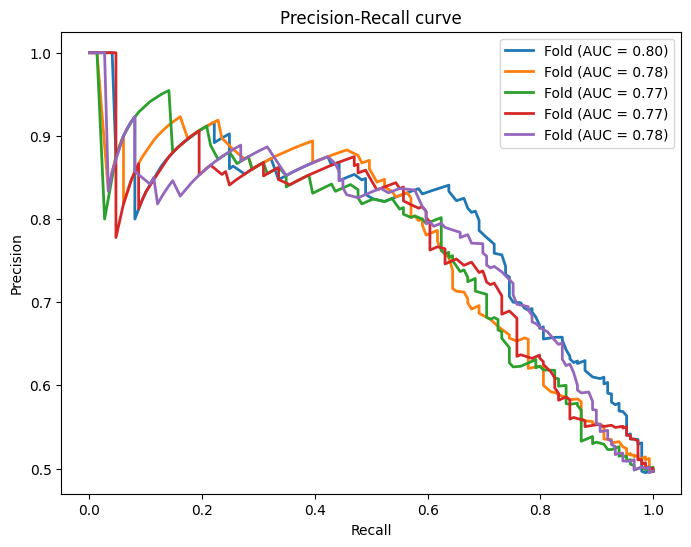

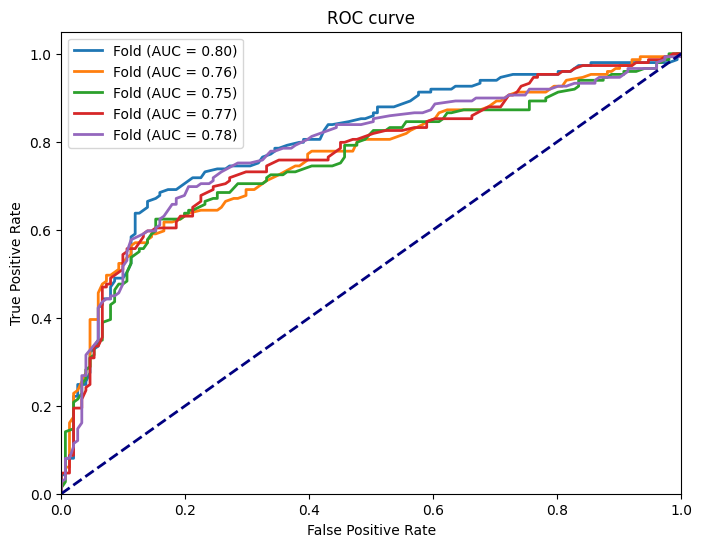

In [6]:
train_and_evaluate_random_forest(df_protein, test_df_protein, encode="RF.ESM2", save_model=True)


In [7]:
#predict
import joblib
import numpy as np
from zzd.utils.assess import multi_scores as scores

def load_and_predict(model_path, train_data, test_data, train_file, test_file, output_train, output_test):
    """
    Load the model and make predictions, saving the results to specified files.
    
    Parameters:
    - model_path: Path to the model file
    - train_data: DataFrame for training data
    - test_data: DataFrame for test data
    - train_file: Path to the training set file for generating the prediction table
    - test_file: Path to the test set file for generating the prediction table
    - output_train: Output filename for training set predictions
    - output_test: Output filename for test set predictions
    """
    try:
        with open(model_path, 'rb') as model_file:
            loaded_model = joblib.load(model_file)
    
        model_params = loaded_model.get_params()
        print("Model hyperparameters:", model_params)
        X_train = train_data.iloc[:, 1:]
        y_train = train_data.iloc[:, 0]
        X_test = test_data.iloc[:, 1:]
        y_test = test_data.iloc[:, 0]

        y_train_pred = loaded_model.predict_proba(X_train)[:, 1]
        y_test_pred = loaded_model.predict_proba(X_test)[:, 1]
        pred_table_train = np.hstack((np.genfromtxt(train_file, str), y_train_pred.reshape(-1, 1)))
        pred_table_test = np.hstack((np.genfromtxt(test_file, str), y_test_pred.reshape(-1, 1)))
        print("Training set evaluation results:")
        result_train = scores(pred_table_train[:, -2], pred_table_train[:, -1], show=True)
        print("Test set evaluation results:")
        result_test = scores(pred_table_test[:, -2], pred_table_test[:, -1], show=True)

        # Save prediction results
        with open(output_train, 'w') as output_file_train:
            for row in pred_table_train:
                output_file_train.write('\t'.join(map(str, row)) + '\n')

        with open(output_test, 'w') as output_file_test:
            for row in pred_table_test:
                output_file_test.write('\t'.join(map(str, row)) + '\n')

        print(f"Prediction results have been saved to {output_train} and {output_test}")

    except Exception as e:
        print("Error occurred during model loading or prediction:", str(e))


In [8]:
train_data = df_protein
test_data = test_df_protein
model_path = '/mnt/disk1/guoxiaokun/isoform/ESM2/1:10/filter.ESM2.rf.best_fold_2.n50.pkl'
train_file = 'train.txt'  
test_file = 'test.txt'   

load_and_predict(
    model_path=model_path,
    train_data=train_data,
    test_data=test_data,
    train_file=train_file,
    test_file=test_file,
    output_train='DeepISO.RF.prediction.ESM2.train.txt',
    output_test='DeepISO.RF.prediction.ESM2.test.txt'
)


Model hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Training set evaluation results:
TP	TN	FP	FN	precision	recall	specificity	Acc	MCC	f1	AUROC	AUPRC
548	543	56	53	0.9073	0.912	0.906	0.909	0.818	0.910	0.970	0.969
Test set evaluation results:
TP	TN	FP	FN	precision	recall	specificity	Acc	MCC	f1	AUROC	AUPRC
105	105	46	44	0.6954	0.705	0.695	0.700	0.400	0.700	0.774	0.786
Prediction results have been saved to DeepISO.RF.prediction.ESM2.train.txt and DeepISO.RF.prediction.ESM2.test.txt
